In [7]:

!pip install seaborn matplotlib pandas

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp313-cp313-win_amd64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.4-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/7 [pyparsing]
   -----------------

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
import os

# Load and Define the Complaint Dataset

In [4]:
df = pd.read_csv('C:/Users/HP//10 Acadamy PRojects/New folder (6)/Complaint-Analysis-RAG/data/complaints.csv')

# Display basic info about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

C:\Users\HP\AppData\Local\Temp\ipykernel_12596\2666754274.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/HP//10 Acadamy PRojects/New folder (6)/Complaint-Analysis-RAG/data/complaints.csv')


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memo

In [5]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


 # EDA

In [6]:

print("\nDataset Shape:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nUnique Products:")
print(df['Product'].unique())


Dataset Shape: (9609797, 18)

Missing Values:
Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64

Unique Products:
['Credit reporting or other personal consumer reports' 'Debt collection'
 'Credit card' 'Checking or savings account'
 'Money transfer, virtual currency, or money service'
 'Vehicle loan or lease' 'Debt

# Distribution of Complaints Across Products

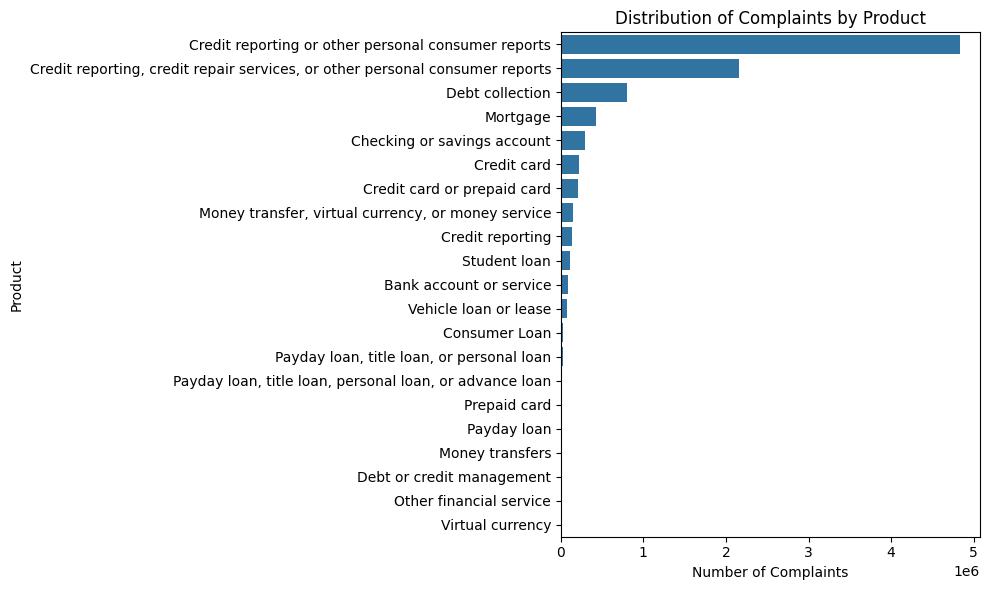


Complaint Counts by Product:
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           

In [7]:
product_counts = df['Product'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.values, y=product_counts.index)
plt.title('Distribution of Complaints by Product')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.tight_layout()
plt.savefig('product_distribution.png')  # Save for report
plt.show()
print("\nComplaint Counts by Product:")
print(product_counts)

# Calculate and Visualize Narrative Lengths


Narrative Length Summary:
count    9.609797e+06
mean     5.446667e+01
std      1.497672e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: narrative_length, dtype: float64


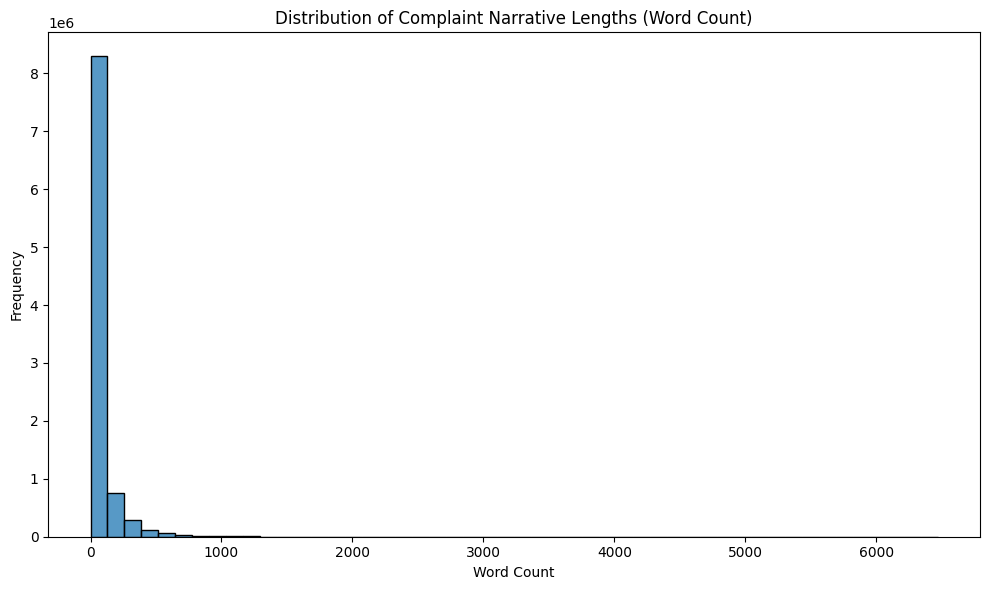

In [8]:
# Step 4: Narrative length analysis
df['narrative_length'] = df['Consumer complaint narrative'].apply(
    lambda x: len(str(x).split()) if pd.notnull(x) else 0
)
print("\nNarrative Length Summary:")
print(df['narrative_length'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_length'], bins=50)
plt.title('Distribution of Complaint Narrative Lengths (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('narrative_length_histogram.png')  # Save for report
plt.show()

# Identify Complaints With and Without Narratives

In [9]:
narrative_counts = df['Consumer complaint narrative'].notnull().value_counts()
print("\nComplaints with/without Narratives:")
print(f"With Narrative: {narrative_counts[True]}")
print(f"Without Narrative: {narrative_counts[False]}")


Complaints with/without Narratives:
With Narrative: 2980756
Without Narrative: 6629041


# Filter the Dataset for Specified Products

In [10]:
# Step 6: Filter for specified products
# Map dataset product names to challenge categories
product_mapping = {
    'Credit card': 'Credit Card',
    'Credit card or prepaid card': 'Credit Card',
    'Checking or savings account': 'Savings Account',
    'Money transfer, virtual currency, or money service': 'Money Transfers',
    'Money transfers': 'Money Transfers',
    'Payday loan, title loan, or personal loan': 'Personal Loan',
    'Consumer Loan': 'Personal Loan',
    'Payday loan, title loan, personal loan, or advance loan': 'Buy Now, Pay Later (BNPL)',
    'Payday loan': 'Personal Loan'
}
df['mapped_product'] = df['Product'].map(product_mapping)
# Filter for the five target products
target_products = ['Credit Card', 'Personal Loan', 'Buy Now, Pay Later (BNPL)', 
                   'Savings Account', 'Money Transfers']
df_filtered = df[df['mapped_product'].isin(target_products)]
print("\nFiltered Dataset Shape:", df_filtered.shape)
print("\nProducts in Filtered Dataset:")
print(df_filtered['mapped_product'].unique())


Filtered Dataset Shape: (958923, 20)

Products in Filtered Dataset:
['Credit Card' 'Savings Account' 'Money Transfers'
 'Buy Now, Pay Later (BNPL)' 'Personal Loan']


# Remove Records with Empty Narratives

In [11]:
# Step 7: Remove empty narratives
df_filtered = df_filtered[df_filtered['Consumer complaint narrative'].notnull()]
print("\nShape after removing empty narratives:", df_filtered.shape)
print("\nMissing narratives in filtered dataset:")
print(df_filtered['Consumer complaint narrative'].isnull().sum())


Shape after removing empty narratives: (465679, 20)

Missing narratives in filtered dataset:
0


# Clean Text Narratives and Save the Preprocessed Dataset

In [15]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # Remove redacted placeholders (e.g., xxxx)
    text = re.sub(r'\bxxxx\b', '', text)
    # Remove boilerplate phrases
    boilerplate = [
        'i am writing to file a complaint',
        'please help',
        'this is regarding my account',
        'dear cfpb',
        'i am writing to dispute'
    ]
    for phrase in boilerplate:
        text = text.replace(phrase, '')
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)
print("\nSample Cleaned Narratives:")
print(df_filtered[['Consumer complaint narrative', 'cleaned_narrative']].head(10))  # Check more rows

# Step 10: Save preprocessed dataset
save_path = r'C:\Users\HP\10 Acadamy PRojects\New folder (6)\Complaint-Analysis-RAG\data'
os.makedirs(save_path, exist_ok=True)
df_filtered.to_csv(os.path.join(save_path, 'preprocessed_complaints.csv'), index=False)
print("\nPreprocessed dataset saved in the 'data' folder.")


Sample Cleaned Narratives:
                            Consumer complaint narrative  \
12237  A XXXX XXXX card was opened under my name by a...   
12532  I made the mistake of using my wellsfargo debi...   
13280  Dear CFPB, I have a secured credit card with c...   
13506  I have a Citi rewards cards. The credit balanc...   
13955  b'I am writing to dispute the following charge...   
14249  Although the account had been deemed closed, I...   
14562  Got locked out of my account because I was try...   
14591  I was trying to log into my account and it wou...   
15740  I received an email in XXXX from my XXXX XXXX ...   
16239  under Idaho state law28-46-413. PAYDAY LOAN BU...   

                                       cleaned_narrative  
12237  a card was opened under my name by a fraudster...  
12532  i made the mistake of using my wellsfargo debi...  
13280  i have a secured credit card with citibank whi...  
13506  i have a citi rewards cards the credit balance...  
13955  b the fol